Classification Report:
               precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
    positive       1.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.75      0.50      0.33         2
weighted avg       0.75      0.50      0.33         2

Confusion Matrix:
 [[1 0]
 [1 0]]


[nltk_data] Downloading package stopwords to C:\Users\SACHIN
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


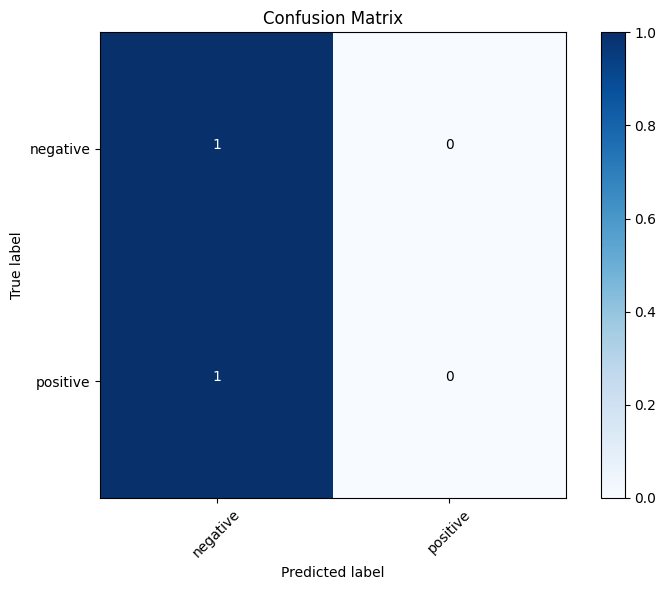

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
import re

# Download stopwords from NLTK
nltk.download('stopwords')

# Load your dataset (uncomment the line below and provide your dataset path)
# df = pd.read_csv("C:\\Users\\SACHIN KUMAR\\OneDrive\\Desktop\\data analytics\\4th\\Twitter_Data.csv")

# Sample dataset creation for demonstration
data = {
    'text': [
        'I love this product!',
        'This is the worst experience I have ever had.',
        'Average quality, could be better.',
        'Fantastic service, highly recommend!',
        'Not worth the money.',
        'I am very happy with my purchase.',
        'Disappointed, it didn’t meet my expectations.',
        'Excellent quality, will buy again.',
        'Terrible, will never buy again.',
        'Okay, but not great.'
    ],
    'sentiment': ['positive', 'negative', 'neutral', 'positive', 'negative', 
                  'positive', 'negative', 'positive', 'negative', 'neutral']
}
df = pd.DataFrame(data)

# Filter the dataset to include only positive and negative sentiments
df = df[df['sentiment'].isin(['positive', 'negative'])]

# 1. Data Preprocessing
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and digits
    text = text.lower()  # Convert to lowercase
    stop_words = set(stopwords.words('english'))  # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['cleaned_text'] = df['text'].apply(preprocess_text)

# 2. Feature Engineering
X = df['cleaned_text']
y = df['sentiment']

# Split the data into training and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 3. Model Training
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# 4. Model Evaluation
y_pred = model.predict(X_test_tfidf)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 5. Data Visualization
labels = np.unique(y)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Labeling the confusion matrix
thresh = conf_matrix.max() / 2
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()
